In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the file path in Google Drive
file_path = '/content/drive/MyDrive/SDB_data_raw.xlsx'  # Replace 'your_file.csv' with the actual file name

# Load the CSV file into a DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame
df.head()

Mounted at /content/drive


,Old_School,Curr_School,Sex,Special_Ed,Disability,Fed_Race,Eng_Prof,FA18_19MathRIT,FA18_19ReadRIT,WT18_19MathRIT,...,Q4_1,Q4_2,Q4_4,Q5_1,Q6_1,Q6_3,Q6_4,Q6_5,Q6_7,Q6_8
0,CONVERSE ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,M,N,0,White,7-Fully English Proficient,183,161,185,...,B,B,D,B,E,B,E,E,C,C
1,CONVERSE ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,F,N,0,Black or African American,7-Fully English Proficient,183,185,190,...,B,A,A,B,E,E,D,C,A,C
2,CONVERSE ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,M,N,0,American Indian or Alaskan Native,7-Fully English Proficient,204,195,208,...,A,A,A,A,F,C,D,C,C,D
3,CONVERSE ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,M,Y,EMOTIONAL BEHAVIORAL DISABILITY,Black or African American,7-Fully English Proficient,181,170,0,...,B,A,A,B,F,C,C,D,D,D
4,CONVERSE ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,F,N,0,White,7-Fully English Proficient,215,210,216,...,A,B,E,B,E,D,C,D,A,A


In [ ]:
# Display the first few rows
df.head()

# Summary statistics and data types
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Old_School      213 non-null    object 
 1   Curr_School     213 non-null    object 
 2   Sex             213 non-null    object 
 3   Special_Ed      213 non-null    object 
 4   Disability      212 non-null    object 
 5   Fed_Race        213 non-null    object 
 6   Eng_Prof        213 non-null    object 
 7   FA18_19MathRIT  213 non-null    int64  
 8   FA18_19ReadRIT  213 non-null    int64  
 9   WT18_19MathRIT  213 non-null    int64  
 10  WT18_19ReadRIT  213 non-null    int64  
 11  Q1_3            213 non-null    object 
 12  Q1_7            210 non-null    object 
 13  Q2_1            210 non-null    float64
 14  Q2_2            211 non-null    float64
 15  Q2_3            213 non-null    object 
 16  Q2_5            206 non-null    object 
 17  Q3_1            213 non-null    obj

,FA18_19MathRIT,FA18_19ReadRIT,WT18_19MathRIT,WT18_19ReadRIT,Q2_1,Q2_2
count,213.000000,213.000000,213.000000,213.000000,210.000000,211.000000
mean,193.474178,185.023474,181.187793,155.633803,2.142857,2.753555
std,33.122209,44.662407,63.774532,83.022770,0.916918,1.221211
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,188.000000,183.000000,190.000000,166.000000,2.000000,2.000000
50%,198.000000,195.000000,203.000000,195.000000,2.000000,3.000000
75%,208.000000,205.000000,210.000000,208.000000,2.000000,3.000000
max,240.000000,224.000000,243.000000,232.000000,7.000000,7.000000


In [ ]:
#Converting english proficiency to numerical data
df['Eng_Prof'] = df['Eng_Prof'].str[0]
df['Eng_Prof'] = df['Eng_Prof'].astype(int)
print(df['Eng_Prof'])

0      7
1      7
2      7
3      7
4      7
      ..
208    7
209    7
210    7
211    7
212    7
Name: Eng_Prof, Length: 213, dtype: int64


In [ ]:
# Calculate the mean for Math and Read columns
df['Math 18-19'] = df[['FA18_19MathRIT', 'WT18_19MathRIT']].mean(axis=1)
df['Read 18-19'] = df[['FA18_19ReadRIT', 'WT18_19ReadRIT']].mean(axis=1)

# Drop the original columns
df = df.drop(columns=['FA18_19MathRIT', 'FA18_19ReadRIT', 'WT18_19MathRIT', 'WT18_19ReadRIT'])

# Display the resulting DataFrame
df

,Old_School,Curr_School,Sex,Special_Ed,Disability,Fed_Race,Eng_Prof,Q1_3,Q1_7,Q2_1,...,Q4_4,Q5_1,Q6_1,Q6_3,Q6_4,Q6_5,Q6_7,Q6_8,Math 18-19,Read 18-19
0,CONVERSE ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,M,N,0,White,7,D,D,1.0,...,D,B,E,B,E,E,C,C,184.0,164.0
1,CONVERSE ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,F,N,0,Black or African American,7,F,D,1.0,...,A,B,E,E,D,C,A,C,186.5,186.0
2,CONVERSE ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,M,N,0,American Indian or Alaskan Native,7,E,E,2.0,...,A,A,F,C,D,C,C,D,206.0,197.5
3,CONVERSE ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,M,Y,EMOTIONAL BEHAVIORAL DISABILITY,Black or African American,7,E,C,2.0,...,A,B,F,C,C,D,D,D,90.5,85.0
4,CONVERSE ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,F,N,0,White,7,E,B,2.0,...,E,B,E,D,C,D,A,A,215.5,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,TODD ELEMENTARY SCHOOL,FRUZEN INTERMEDIATE SCHOOL,M,N,Speech & Language,White,7,E,D,2.0,...,D,A,F,B,C,C,C,D,197.5,180.5
209,TODD ELEMENTARY SCHOOL,FRUZEN INTERMEDIATE SCHOOL,M,Y,EMOTIONAL BEHAVIORAL DISABILITY,Black or African American,7,D,NaN,NaN,...,E,B,F,A,C,A,A,NaN,206.5,200.5
210,TODD ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,F,N,Speech & Language,White,7,E,D,3.0,...,E,B,G,D,D,F,C,D,212.0,203.5
211,Other,CUNNINGHAM INTERMEDIATE SCHOOL,M,Y,Traumatic Brain Injury,Black or African American,7,F,A,3.0,...,A,B,F,A,D,E,A,A,78.5,75.0


In [ ]:
#Converting the M/F column into 1 and 0 resectively
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
print(df['Sex'])


0      1
1      0
2      1
3      1
4      0
      ..
208    1
209    1
210    0
211    1
212    1
Name: Sex, Length: 213, dtype: int64


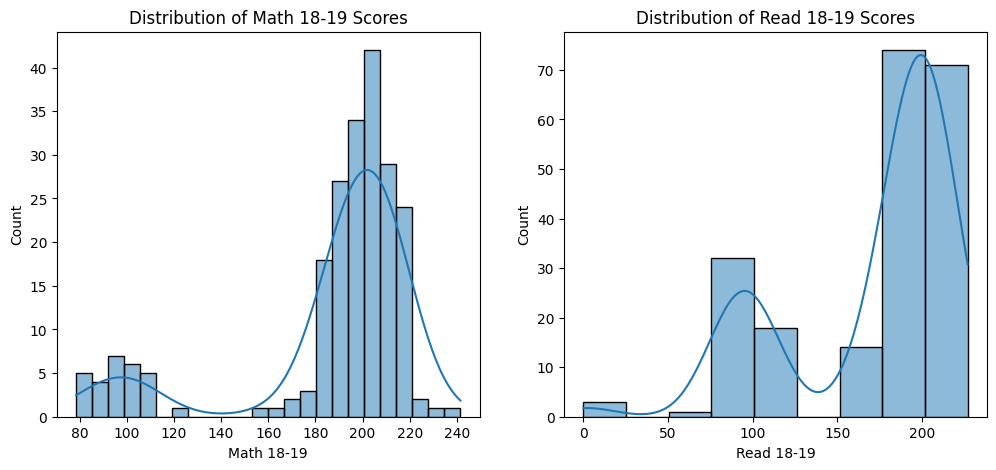

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Math 18-19'], kde=True)
plt.title('Distribution of Math 18-19 Scores')

plt.subplot(1, 2, 2)
sns.histplot(df['Read 18-19'], kde=True)
plt.title('Distribution of Read 18-19 Scores')

plt.show()

<Figure size 1000x600 with 0 Axes>

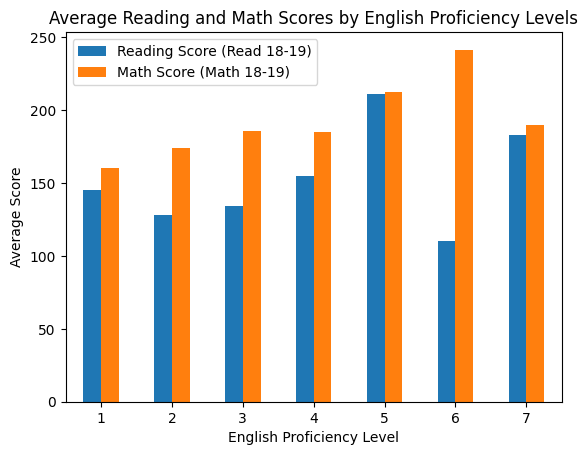

In [ ]:
avg_scores = df.groupby('Eng_Prof')[['Read 18-19', 'Math 18-19']].mean().reset_index()

plt.figure(figsize=(10, 6))
avg_scores.plot(kind='bar', x='Eng_Prof', stacked=False)
plt.title('Average Reading and Math Scores by English Proficiency Levels')
plt.xlabel('English Proficiency Level')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(['Reading Score (Read 18-19)', 'Math Score (Math 18-19)'])
plt.show()

In [ ]:
# Define the numerical mapping for Q1_3
q1_3_numerical_mapping = {
    'A': 1,  # Very poor
    'B': 2,  # Poor
    'C': 3,  # Average
    'D': 4,  # Good
    'E': 5,  # Very good
    'F': 6,  # Other
}

# Apply the numerical mapping and explicitly convert the column to integer type
df['Q1_3'] = df['Q1_3'].replace(q1_3_numerical_mapping).astype(int)

# Display unique values in Q1_3 to confirm
unique_values = df['Q1_3'].unique()
print("Unique values in Q1_3:", unique_values)

Unique values in Q1_3: [4 6 5 3 2 1]


<ipython-input-9-1acc9b4692db>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q1_3'] = df['Q1_3'].replace(q1_3_numerical_mapping).astype(int)


In [ ]:
#Converting strings in disability to 1s
for i in df['Disability']:
  if type(i)==str:
    df['Disability'] = df['Disability'].replace(i, 1)
print(df['Disability'])

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
208    1.0
209    1.0
210    1.0
211    1.0
212    1.0
Name: Disability, Length: 213, dtype: float64


<ipython-input-10-8a1cd64a0259>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Disability'] = df['Disability'].replace(i, 1)


In [ ]:
# Define the numerical mapping for Q1_7
q1_7_numerical_mapping = {
    'A': 0,  # 0 times
    'B': 1,  # 1 time
    'C': 2,  # 2 times
    'D': 3,  # 3 times
    'E': 4,  # 4 times
    'F': 5,  # 5 times
    'G': 6   # More than 5 times
}
# Replace values with the mapping
df['Q1_7'] = df['Q1_7'].replace(q1_7_numerical_mapping)

# Fill NaNs with the median value of Q1_7
df['Q1_7'] = df['Q1_7'].fillna(round(df['Q1_7'].median()))

# Convert to integer type
df['Q1_7'] = df['Q1_7'].astype(int)

# Display unique values to confirm
unique_values_q1_7 = df['Q1_7'].unique()
print("Unique values in Q1_7:", unique_values_q1_7)

Unique values in Q1_7: [3 4 2 1 0 5 6]


<ipython-input-11-cb0c21126643>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q1_7'] = df['Q1_7'].replace(q1_7_numerical_mapping)


In [ ]:
# Replace missing values in 'Disability' with 0 and rounded median for 'Q2_1' and 'Q2_2'
df.fillna({
    'Disability': 0,
    'Q2_1': round(df['Q2_1'].median()),
    'Q2_2': round(df['Q2_2'].median())
}, inplace=True)

# Verify that there are no more missing values in these columns
print("Remaining missing values:")
print(df[['Disability', 'Q2_1', 'Q2_2']].isnull().sum())

Remaining missing values:
Disability    0
Q2_1          0
Q2_2          0
dtype: int64


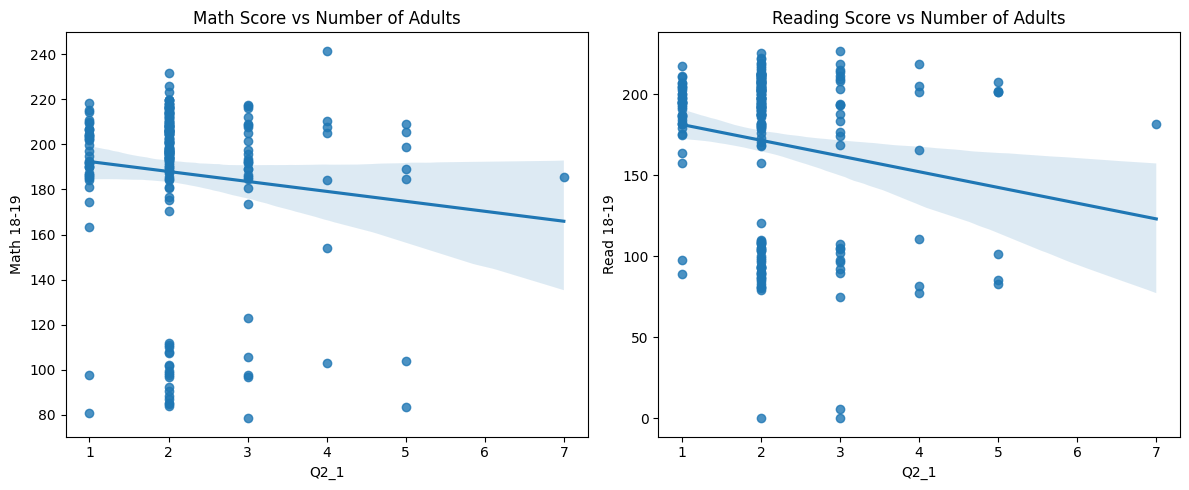

In [ ]:
plt.figure(figsize=(12, 5))

# Math Score vs Number of Adults
plt.subplot(1, 2, 1)
sns.regplot(df, x='Q2_1', y='Math 18-19')
plt.title('Math Score vs Number of Adults')

# Reading Score vs Number of Adults
plt.subplot(1, 2, 2)
sns.regplot(df, x='Q2_1', y='Read 18-19')
plt.title('Reading Score vs Number of Adults')

plt.tight_layout()
plt.show()

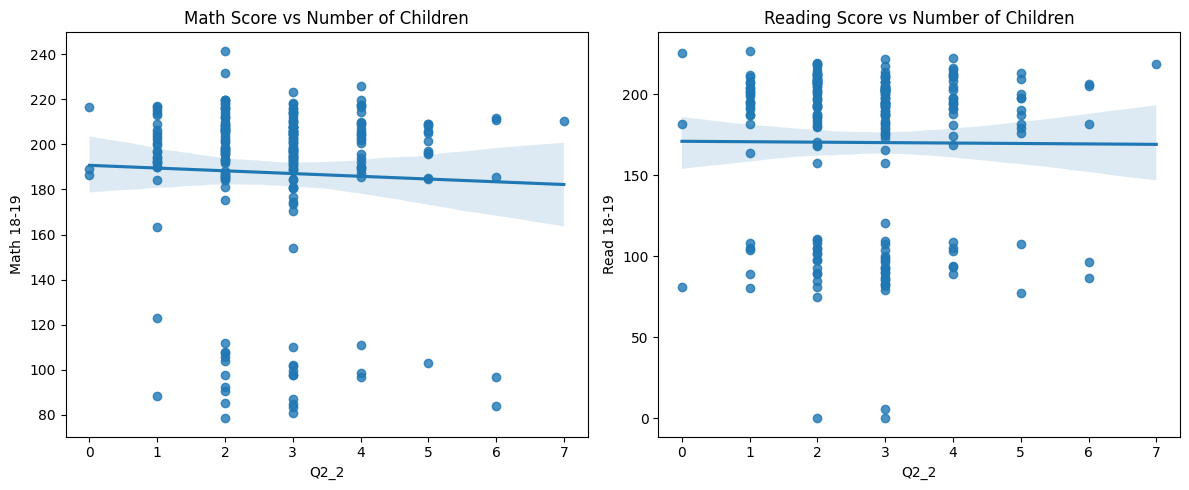

In [ ]:
plt.figure(figsize=(12, 5))

# Math Score vs Number of Adults
plt.subplot(1, 2, 1)
sns.regplot(df, x='Q2_2', y='Math 18-19')
plt.title('Math Score vs Number of Children')

# Reading Score vs Number of Adults
plt.subplot(1, 2, 2)
sns.regplot(df, x='Q2_2', y='Read 18-19')
plt.title('Reading Score vs Number of Children')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the number of children per adult ratio
df['Children_Per_Adult'] = df['Q2_2'] / df['Q2_1']

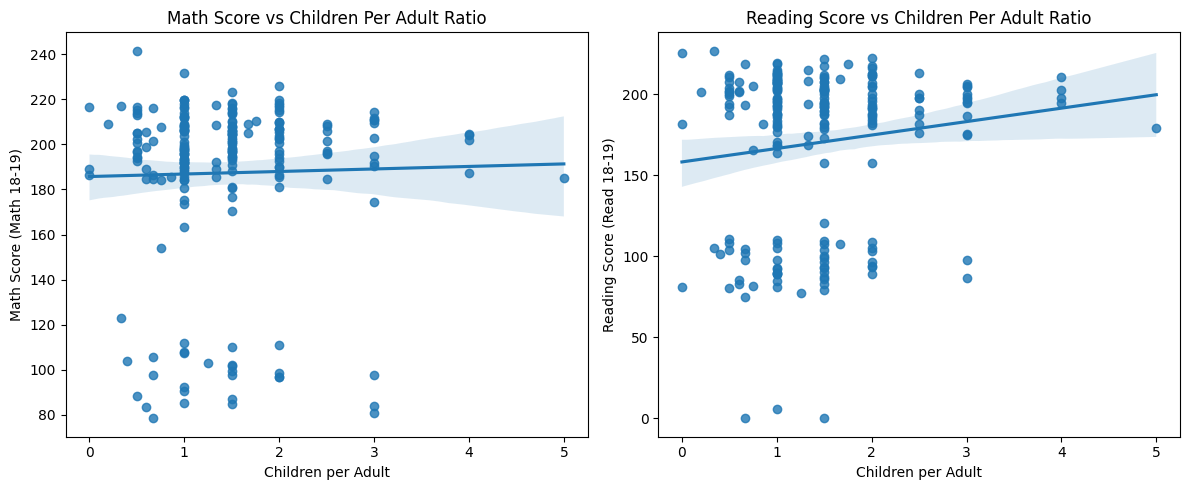

In [ ]:
plt.figure(figsize=(12, 5))

# Math Score vs Children Per Adult
plt.subplot(1, 2, 1)
sns.regplot(df, x='Children_Per_Adult', y='Math 18-19')
plt.title('Math Score vs Children Per Adult Ratio')
plt.xlabel('Children per Adult')
plt.ylabel('Math Score (Math 18-19)')

# Reading Score vs Children Per Adult
plt.subplot(1, 2, 2)
sns.regplot(df, x='Children_Per_Adult', y='Read 18-19')
plt.title('Reading Score vs Children Per Adult Ratio')
plt.xlabel('Children per Adult')
plt.ylabel('Reading Score (Read 18-19)')

plt.tight_layout()
plt.show()

In [ ]:
# Define the numerical mapping for Q2_3
q2_3_mapping = {
    'A': 0,  # Less than a year
    'B': 1,  # 1-3 years
    'C': 2,  # 4-6 years
    'D': 3,  # 7-9 years
    'E': 4   # 10 years or longer
}

# Apply the mapping to Q2_3
df['Q2_3'] = df['Q2_3'].replace(q2_3_mapping)
df['Q2_3'] = df['Q2_3'].fillna(round(df['Q2_3'].median()))

<ipython-input-17-e4d6095d4272>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q2_3'] = df['Q2_3'].replace(q2_3_mapping)


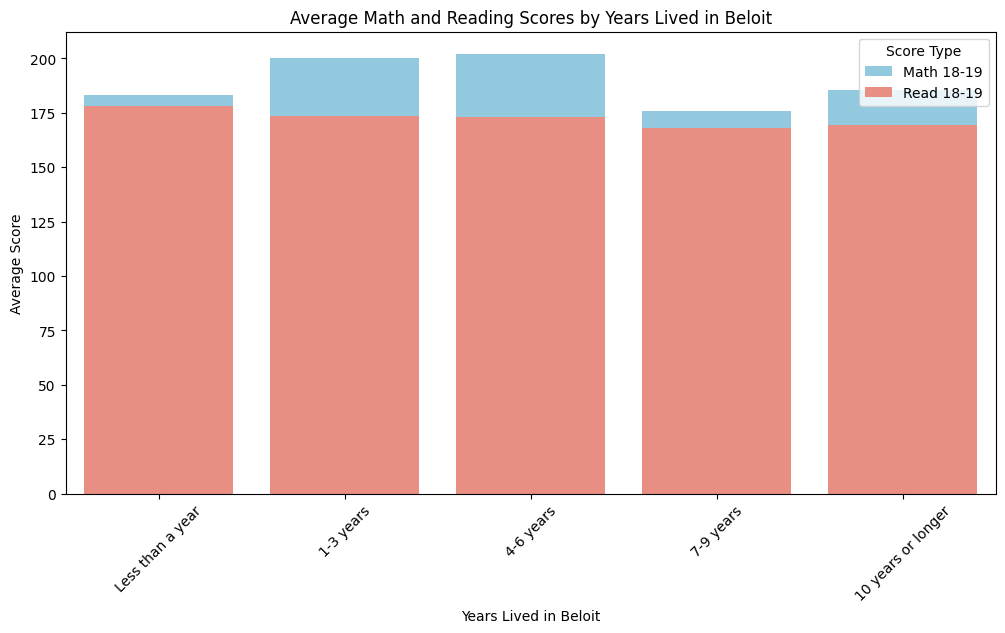

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Q2_3 and calculate the mean scores
average_scores = df.groupby('Q2_3')[['Math 18-19', 'Read 18-19']].mean().reset_index()

# Define labels for Q2_3 categories
labels = [
    'Less than a year',
    '1-3 years',
    '4-6 years',
    '7-9 years',
    '10 years or longer'
]
average_scores['Q2_3_Label'] = labels

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=average_scores, x='Q2_3_Label', y='Math 18-19', color='skyblue', label='Math 18-19')
sns.barplot(data=average_scores, x='Q2_3_Label', y='Read 18-19', color='salmon', label='Read 18-19')

plt.title('Average Math and Reading Scores by Years Lived in Beloit')
plt.xlabel('Years Lived in Beloit')
plt.ylabel('Average Score')
plt.legend(title="Score Type")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check unique values in Q2_3 after applying the mapping
unique_values_q2_3 = df['Q2_3'].unique()
print("Unique values in Q2_3:", unique_values_q2_3)

Unique values in Q2_3: [4 2 1 0 3]


In [ ]:
# Define the mapping for Q2_5 income categories
q2_5_mapping = {
    'A': 1,  # At or less than $22,459
    'B': 2,  # $22,460 - $30,451
    'C': 3,  # $30,452 - $38,443
    'D': 4,  # $38,444 - $46,435
    'E': 5,  # $46,436 - $54,427
    'F': 6,  # $54,428 - $62,419
    'G': 7,  # $62,420 - $70,411
    'H': 8,  # $70,412 - $78,403
    'I': 9,  # $78,404 - $86,395
    'J': 10, # $86,396 - $94,387
    'K': 11, # $94,388 - $102,379
    'L': 12, # $102,380 - $110,371
    'M': 13  # At or more than $110,372
}

In [ ]:
# Apply the mapping to Q2_5
df['Q2_5'] = df['Q2_5'].replace(q2_5_mapping)

# Fill any missing values in Q2_5 with the median
df['Q2_5'] = df['Q2_5'].fillna(round(df['Q2_5'].median()))

# Display unique values in Q2_5 to confirm
unique_values_q2_5 = df['Q2_5'].unique()
print("Unique values in Q2_5:", unique_values_q2_5)

Unique values in Q2_5: [ 3.  1. 13. 11.  4.  2.  7.  8.  9.  5.  6. 12. 10.]


<ipython-input-21-2af1a1f5fc55>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q2_5'] = df['Q2_5'].replace(q2_5_mapping)


In [ ]:
# Define the numerical mapping for Q3_1
q3_1_mapping = {
    'A': 0,  # Yes
    'B': 1,  # No, the child's biological mother lives elsewhere.
    'C': 2   # No, the child's biological mother is deceased.
}

In [ ]:
# Apply the mapping to Q3_1
df['Q3_1'] = df['Q3_1'].replace(q3_1_mapping)

# Fill any missing values in Q3_1 with the median
df['Q3_1'] = df['Q3_1'].fillna(round(df['Q3_1'].median()))

# Display unique values in Q3_1 to confirm
unique_values_q3_1 = df['Q3_1'].unique()
print("Unique values in Q3_1:", unique_values_q3_1)

Unique values in Q3_1: [0 2 1]


<ipython-input-23-8a5425ff8d1e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q3_1'] = df['Q3_1'].replace(q3_1_mapping)


In [ ]:
# Define the numerical mapping for Q3_2
q3_2_mapping = {
    'A': 0,  # Less than high school
    'B': 1,  # High school diploma or GED
    'b': 1,  # High school diploma or GED
    'C': 2,  # Some college
    'D': 3,  # Associate Degree
    'E': 4,  # Bachelor Degree
    'F': 5,  # Master Degree, PhD, JD, MD, or other advanced degree
    'G': 6   # Other
}

In [ ]:
# Apply the mapping to Q3_2
df['Q3_2'] = df['Q3_2'].replace(q3_2_mapping)

# Fill any missing values in Q3_2 with the median
df['Q3_2'] = df['Q3_2'].fillna(round(df['Q3_2'].median()))

# Display unique values in Q3_2 to confirm
unique_values_q3_2 = df['Q3_2'].unique()
print("Unique values in Q3_2:", unique_values_q3_2)

Unique values in Q3_2: [1. 0. 3. 2. 4. 6. 5.]


<ipython-input-25-daa58c98ab99>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q3_2'] = df['Q3_2'].replace(q3_2_mapping)


In [ ]:
# Define the numerical mapping for Q3_4
q3_4_mapping = {
    'A': 0,  # The child's mother does not work
    'B': 1,  # Less than 20 hours
    'C': 2,  # 21-30 hours
    'D': 3,  # 31-40 hours
    'E': 4,  # 41-50 hours
    'F': 5,  # 51-60 hours
    'G': 6   # More than 60 hours
}

In [ ]:
# Apply the mapping to Q3_4
df['Q3_4'] = df['Q3_4'].replace(q3_4_mapping)

# Fill any missing values in Q3_4 with the median
df['Q3_4'] = df['Q3_4'].fillna(round(df['Q3_4'].median()))

# Display unique values in Q3_4 to confirm
unique_values_q3_4 = df['Q3_4'].unique()
print("Unique values in Q3_4:", unique_values_q3_4)

Unique values in Q3_4: [3 4 0 1 2 5 6]


<ipython-input-27-8a02aa66c0f5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q3_4'] = df['Q3_4'].replace(q3_4_mapping)


In [ ]:
# Define the numerical mapping for Q4_1
q4_1_mapping = {
    'A': 0,  # Yes
    'B': 1,  # No, the child's biological father lives elsewhere
    'C': 2   # No, the child's biological father is deceased
}

In [ ]:
# Apply the mapping to Q4_1
df['Q4_1'] = df['Q4_1'].replace(q4_1_mapping)

# Fill any missing values in Q4_1 with the median
df['Q4_1'] = df['Q4_1'].fillna(round(df['Q4_1'].median()))

# Display unique values in Q4_1 to confirm
unique_values_q4_1 = df['Q4_1'].unique()
print("Unique values in Q4_1:", unique_values_q4_1)

Unique values in Q4_1: [1. 0. 2.]


<ipython-input-29-f7c52c940336>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q4_1'] = df['Q4_1'].replace(q4_1_mapping)


In [ ]:
# Define the numerical mapping for Q4_2
q4_2_mapping = {
    'A': 0,  # Less than high school
    'B': 1,  # High school diploma or GED
    'C': 2,  # Some college
    'D': 3,  # Associate degree
    'E': 4,  # Bachelor degree
    'F': 5,  # Master degree, PhD, JD, MD, or other advanced degree
    'G': 6   # Other
}

In [ ]:
# Apply the mapping to Q4_2
df['Q4_2'] = df['Q4_2'].replace(q4_2_mapping)

# Fill any missing values in Q4_2 with the median
df['Q4_2'] = df['Q4_2'].fillna(round(df['Q4_2'].median()))

# Display unique values in Q4_2 to confirm
unique_values_q4_2 = df['Q4_2'].unique()
print("Unique values in Q4_2:", unique_values_q4_2)

Unique values in Q4_2: [1. 0. 3. 2. 4. 5. 6.]


<ipython-input-31-b1ecf641d2da>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q4_2'] = df['Q4_2'].replace(q4_2_mapping)


In [ ]:
# Define the numerical mapping for Q4_4
q4_4_mapping = {
    'A': 0,  # The child's father does not work
    'B': 1,  # Less than 20 hours
    'C': 2,  # 21-30 hours
    'D': 3,  # 31-40 hours
    'E': 4,  # 41-50 hours
    'F': 5,  # 51-60 hours
    'G': 6   # More than 60 hours
}

In [ ]:
# Apply the mapping to Q4_4
df['Q4_4'] = df['Q4_4'].replace(q4_4_mapping)

# Fill any missing values in Q4_4 with the median
df['Q4_4'] = df['Q4_4'].fillna(round(df['Q4_4'].median()))

# Display unique values in Q4_4 to confirm
unique_values_q4_4 = df['Q4_4'].unique()
print("Unique values in Q4_4:", unique_values_q4_4)

<ipython-input-33-33a3c6a7eb99>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q4_4'] = df['Q4_4'].replace(q4_4_mapping)


Unique values in Q4_4: [3 0 4 5 6 1 2]


In [ ]:
# Define the numerical mapping for Q5_1
q5_1_mapping = {
    'A': 0,  # Yes
    'B': 1   # No
}

In [ ]:
# Apply the mapping to Q5_1
df['Q5_1'] = df['Q5_1'].replace(q5_1_mapping)

# Fill any missing values in Q5_1 with the median
df['Q5_1'] = df['Q5_1'].fillna(round(df['Q5_1'].median()))

# Display unique values in Q5_1 to confirm
unique_values_q5_1 = df['Q5_1'].unique()
print("Unique values in Q5_1:", unique_values_q5_1)

Unique values in Q5_1: [1 0]


<ipython-input-35-92d2ed3b7a72>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q5_1'] = df['Q5_1'].replace(q5_1_mapping)


In [ ]:
# Define the numerical mapping for Q6_1
q6_1_mapping = {
    'A': 0,  # Less than high school
    'B': 1,  # High school diploma or GED
    'C': 2,  # Some college
    'D': 3,  # Associate degree
    'E': 4,  # College or bachelor degree
    'F': 5,  # Master degree, PhD, JD, MD or other advanced degree
    'G': 6,  # I don't know
    'H': 7   # Other
}

In [ ]:
# Apply the mapping to Q6_1
df['Q6_1'] = df['Q6_1'].replace(q6_1_mapping)

# Fill any missing values in Q6_1 with the median
df['Q6_1'] = df['Q6_1'].fillna(round(df['Q6_1'].median()))

# Display unique values in Q6_1 to confirm
unique_values_q6_1 = df['Q6_1'].unique()
print("Unique values in Q6_1:", unique_values_q6_1)

Unique values in Q6_1: [4. 5. 2. 6. 3. 1. 7. 0.]


<ipython-input-37-c11dc39cf38c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_1'] = df['Q6_1'].replace(q6_1_mapping)


In [ ]:
# Define the numerical mapping for Q6_3
q6_3_mapping = {
    'A': 0,  # Never
    'B': 1,  # Rarely
    'C': 2,  # Sometimes
    'D': 3,  # Often
    'E': 4   # Very regularly
}

In [ ]:
# Apply the mapping to Q6_3
df['Q6_3'] = df['Q6_3'].replace(q6_3_mapping)

# Fill any missing values in Q6_3 with the median
df['Q6_3'] = df['Q6_3'].fillna(round(df['Q6_3'].median()))

# Display unique values in Q6_3 to confirm
unique_values_q6_3 = df['Q6_3'].unique()
print("Unique values in Q6_3:", unique_values_q6_3)

Unique values in Q6_3: [1. 4. 2. 3. 0.]


<ipython-input-39-44f2686b56ba>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_3'] = df['Q6_3'].replace(q6_3_mapping)


In [ ]:
# Define the reverse numerical mapping for Q6_4
q6_4_reverse_mapping = {
    'A': 4,  # Never
    'B': 3,  # Rarely
    'C': 2,  # Sometimes
    'D': 1,  # Often
    'E': 0   # Very regularly
}

In [ ]:
# Apply the reverse mapping to Q6_4
df['Q6_4'] = df['Q6_4'].replace(q6_4_reverse_mapping)

# Fill any missing values in Q6_4 with the median
df['Q6_4'] = df['Q6_4'].fillna(round(df['Q6_4'].median()))

# Display unique values in Q6_4 to confirm
unique_values_q6_4 = df['Q6_4'].unique()
print("Unique values in Q6_4:", unique_values_q6_4)

Unique values in Q6_4: [0. 1. 2. 3. 4.]


<ipython-input-41-caf5823c1a7c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_4'] = df['Q6_4'].replace(q6_4_reverse_mapping)


In [ ]:
# Define the numerical mapping for Q6_5
q6_5_mapping = {
    'A': 0,  # Never
    'B': 1,  # Rarely
    'C': 2,  # 1-2 times per week
    'D': 3,  # 3-4 times per week
    'E': 4,  # Almost every day (5-6 times per week)
    'F': 5,  # Everyday
    'G': 6   # Other
}

In [ ]:
# Apply the mapping to Q6_5
df['Q6_5'] = df['Q6_5'].replace(q6_5_mapping)

# Fill any missing values in Q6_5 with the median
df['Q6_5'] = df['Q6_5'].fillna(round(df['Q6_5'].median()))

# Display unique values in Q6_5 to confirm
unique_values_q6_5 = df['Q6_5'].unique()
print("Unique values in Q6_5:", unique_values_q6_5)

Unique values in Q6_5: [4. 2. 3. 1. 0. 5. 6.]


<ipython-input-43-390edb37effb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_5'] = df['Q6_5'].replace(q6_5_mapping)


In [ ]:
# Define the numerical mapping for Q6_7
q6_7_mapping = {
    'A': 0,  # I do not set any rule
    'B': 1,  # I set a rule but do not enforce it much
    'C': 2,  # I set a rule and moderately enforce it
    'D': 3,  # I set a rule and strictly enforce it
    'E': 4   # Other
}

In [ ]:
# Apply the mapping to Q6_7
df['Q6_7'] = df['Q6_7'].replace(q6_7_mapping)

# Fill any missing values in Q6_7 with the median
df['Q6_7'] = df['Q6_7'].fillna(round(df['Q6_7'].median()))

# Display unique values in Q6_7 to confirm
unique_values_q6_7 = df['Q6_7'].unique()
print("Unique values in Q6_7:", unique_values_q6_7)

<ipython-input-45-4b01c2e50056>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_7'] = df['Q6_7'].replace(q6_7_mapping)


Unique values in Q6_7: [2. 0. 3. 4. 1.]


In [ ]:
# Define the numerical mapping for Q6_8
q6_8_mapping = {
    'A': 0,  # I do not set any rule
    'B': 1,  # I set a rule but do not enforce it much
    'C': 2,  # I set a rule and moderately enforce it
    'D': 3,  # I set a rule and strictly enforce it
    'E': 4   # Other
}

In [ ]:
# Apply the mapping to Q6_8
df['Q6_8'] = df['Q6_8'].replace(q6_8_mapping)

# Fill any missing values in Q6_8 with the median
df['Q6_8'] = df['Q6_8'].fillna(round(df['Q6_8'].median()))

# Display unique values in Q6_8 to confirm
unique_values_q6_8 = df['Q6_8'].unique()
print("Unique values in Q6_8:", unique_values_q6_8)

Unique values in Q6_8: [2. 3. 0. 1. 4.]


<ipython-input-47-75ac633a4da0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_8'] = df['Q6_8'].replace(q6_8_mapping)


In [ ]:
# Find unique values in Old_School and Curr_School
unique_old_school = df['Old_School'].unique()
unique_curr_school = df['Curr_School'].unique()

print("Unique values in Old_School:", unique_old_school)
print("Unique values in Curr_School:", unique_curr_school)

Unique values in Old_School: ['CONVERSE ELEMENTARY SCHOOL' 'GASTON ELEMENTARY SCHOOL'
 'HACKETT ELEMENTARY SCHOOL' 'MERRILL ELEMENTARY SCHOOL'
 'ROBINSON ELEMENTARY SCHOOL' 'TODD ELEMENTARY SCHOOL' 'Other']
Unique values in Curr_School: ['CUNNINGHAM INTERMEDIATE SCHOOL' 'MCNEEL INTERMEDIATE SCHOOL'
 'ALDRICH INTERMEDIATE SCHOOL' 'FRUZEN INTERMEDIATE SCHOOL']


In [ ]:
old_school_labels = {
    'CONVERSE ELEMENTARY SCHOOL': 6,
    'GASTON ELEMENTARY SCHOOL': 5,
    'MERRILL ELEMENTARY SCHOOL': 4,
    'HACKETT ELEMENTARY SCHOOL': 3,
    'TODD ELEMENTARY SCHOOL': 2,
    'ROBINSON ELEMENTARY SCHOOL': 1,
    'Other': 0
}

curr_school_labels = {
    'MCNEEL INTERMEDIATE SCHOOL': 4,
    'FRUZEN INTERMEDIATE SCHOOL': 3,
    'CUNNINGHAM INTERMEDIATE SCHOOL': 2,
    'ALDRICH INTERMEDIATE SCHOOL': 1
}

In [ ]:
df['Old_School_Label'] = df['Old_School'].map(old_school_labels)
df['Curr_School_Label'] = df['Curr_School'].map(curr_school_labels)

print(df[['Old_School', 'Old_School_Label', 'Curr_School', 'Curr_School_Label']].head())

                   Old_School  Old_School_Label  \
0  CONVERSE ELEMENTARY SCHOOL                 6   
1  CONVERSE ELEMENTARY SCHOOL                 6   
2  CONVERSE ELEMENTARY SCHOOL                 6   
3  CONVERSE ELEMENTARY SCHOOL                 6   
4  CONVERSE ELEMENTARY SCHOOL                 6   

                      Curr_School  Curr_School_Label  
0  CUNNINGHAM INTERMEDIATE SCHOOL                  2  
1  CUNNINGHAM INTERMEDIATE SCHOOL                  2  
2  CUNNINGHAM INTERMEDIATE SCHOOL                  2  
3  CUNNINGHAM INTERMEDIATE SCHOOL                  2  
4      MCNEEL INTERMEDIATE SCHOOL                  4  


In [ ]:
# Display the first few rows
df.head()

# Summary statistics and data types
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Old_School          213 non-null    object 
 1   Curr_School         213 non-null    object 
 2   Sex                 213 non-null    int64  
 3   Special_Ed          213 non-null    object 
 4   Disability          213 non-null    float64
 5   Fed_Race            213 non-null    object 
 6   Eng_Prof            213 non-null    int64  
 7   Q1_3                213 non-null    int64  
 8   Q1_7                213 non-null    int64  
 9   Q2_1                213 non-null    float64
 10  Q2_2                213 non-null    float64
 11  Q2_3                213 non-null    int64  
 12  Q2_5                213 non-null    float64
 13  Q3_1                213 non-null    int64  
 14  Q3_2                213 non-null    float64
 15  Q3_4                213 non-null    int64  
 16  Q4_1    

,Sex,Disability,Eng_Prof,Q1_3,Q1_7,Q2_1,Q2_2,Q2_3,Q2_5,Q3_1,...,Q6_3,Q6_4,Q6_5,Q6_7,Q6_8,Math 18-19,Read 18-19,Children_Per_Adult,Old_School_Label,Curr_School_Label
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,0.460094,0.173709,5.784038,4.610329,1.056338,2.140845,2.755869,3.446009,3.995305,0.084507,...,2.319249,1.455399,2.474178,1.943662,2.295775,187.330986,170.328638,1.446199,3.441315,2.657277
std,0.499579,0.379751,2.018857,0.728973,1.298264,0.910563,1.215670,1.104513,3.220655,0.295236,...,1.005389,1.011319,1.330179,0.934970,0.972175,37.182772,49.837235,0.798988,1.876514,1.098844
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,78.500000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000,4.000000,0.000000,2.000000,2.000000,4.000000,1.000000,0.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,187.500000,120.500000,1.000000,2.000000,2.000000
50%,0.000000,0.000000,7.000000,5.000000,1.000000,2.000000,3.000000,4.000000,3.000000,0.000000,...,2.000000,1.000000,2.000000,2.000000,3.000000,198.500000,193.000000,1.500000,3.000000,3.000000
75%,1.000000,0.000000,7.000000,5.000000,2.000000,2.000000,3.000000,4.000000,6.000000,0.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,208.000000,204.500000,2.000000,5.000000,4.000000
max,1.000000,1.000000,7.000000,6.000000,6.000000,7.000000,7.000000,4.000000,13.000000,2.000000,...,4.000000,4.000000,6.000000,4.000000,4.000000,241.500000,227.000000,5.000000,6.000000,4.000000


In [ ]:
df.to_excel('SDBdata_final.xlsx', index = False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd

# Define features (X) and targets (y)
X = df.drop(columns=['Math 18-19', 'Read 18-19', 'Old_School', 'Curr_School'])
y_math = df['Math 18-19']
y_read = df['Read 18-19']

# List of categorical features based on the survey structure
categorical_features = [
    'Sex', 'Fed_Race', 'Eng_Prof']

# 'Q1_3', 'Q1_7', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_5', 'Q3_1', 'Q3_2', 'Q3_4','Q4_1', 'Q4_2', 'Q4_4', 'Q5_1', 'Q6_1', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_7', 'Q6_8'

# Identify numeric features (excluding those categorized as categorical)
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features = [col for col in numeric_features if col not in categorical_features]

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split data into training and testing sets
y = df[['Math 18-19', 'Read 18-19']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

multi_target_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(LinearRegression()))
])

multi_target_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Disability', 'Q1_3', 'Q1_7',
                                                   'Q2_1', 'Q2_2', 'Q2_3',
                                                   'Q2_5', 'Q3_1', 'Q3_2',
                                                   'Q3_4', 'Q4_1', 'Q4_2',
                                                   'Q4_4', 'Q5_1', 'Q6_1',
                                                   'Q6_3', 'Q6_4', 'Q6_5',
                                                   'Q6_7', 'Q6_8',
                                                   'Children_Per_Adult',
                                                   'Old_School_Label',
                                                   'Curr_School_Label']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Fed_Race',
                                                   'Eng_Prof'])])),
                ('regressor',
                 MultiOutputRegressor(estimator=LinearRegression()))])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
import numpy as np

# Predict on the test set
predictions = multi_target_model.predict(X_test)

# Separate predictions
math_predictions = predictions[:, 0]
read_predictions = predictions[:, 1]

# Math predictions
mae_math = mean_absolute_error(y_test['Math 18-19'], math_predictions)
mse_math = mean_squared_error(y_test['Math 18-19'], math_predictions)
rmse_math = np.sqrt(mse_math)
r2_math = r2_score(y_test['Math 18-19'], math_predictions)
explained_variance_math = explained_variance_score(y_test['Math 18-19'], math_predictions)
median_absolute_error_math = median_absolute_error(y_test['Math 18-19'], math_predictions)

# Print Math results
print("Math Score Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_math}")
print(f"Mean Squared Error (MSE): {mse_math}")
print(f"Root Mean Squared Error (RMSE): {rmse_math}")
print(f"R-squared (R²): {r2_math}")
print(f"Explained Variance Score: {explained_variance_math}")
print(f"Median Absolute Error: {median_absolute_error_math}")
print()

# Read predictions
mae_read = mean_absolute_error(y_test['Read 18-19'], read_predictions)
mse_read = mean_squared_error(y_test['Read 18-19'], read_predictions)
rmse_read = np.sqrt(mse_read)
r2_read = r2_score(y_test['Read 18-19'], read_predictions)
explained_variance_read = explained_variance_score(y_test['Read 18-19'], read_predictions)
median_absolute_error_read = median_absolute_error(y_test['Read 18-19'], read_predictions)

# Print Read results
print("Read Score Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_read}")
print(f"Mean Squared Error (MSE): {mse_read}")
print(f"Root Mean Squared Error (RMSE): {rmse_read}")
print(f"R-squared (R²): {r2_read}")
print(f"Explained Variance Score: {explained_variance_read}")
print(f"Median Absolute Error: {median_absolute_error_read}")

Math Score Evaluation:
Mean Absolute Error (MAE): 22.387833127175735
Mean Squared Error (MSE): 1198.4724875232973
Root Mean Squared Error (RMSE): 34.61896138712566
R-squared (R²): 0.08267972671727719
Explained Variance Score: 0.08646898848987017
Median Absolute Error: 13.364631566829502

Read Score Evaluation:
Mean Absolute Error (MAE): 38.81123997322263
Mean Squared Error (MSE): 2480.3555798229795
Root Mean Squared Error (RMSE): 49.80316837132934
R-squared (R²): 0.1992230936288335
Explained Variance Score: 0.20587338975386194
Median Absolute Error: 31.16178093692963


In [ ]:
'''MAE for Math: 21.43 means that, on average, the predicted Math scores are off by approximately
   21.43 points from the actual Math scores in the test dataset.
   MAE for Read: 33.20 indicates that, on average, the predicted Read scores are off by about
   33.20 points from the actual Read scores.'''


'MAE for Math: 21.43 means that, on average, the predicted Math scores are off by approximately\n   21.43 points from the actual Math scores in the test dataset.\n   MAE for Read: 33.20 indicates that, on average, the predicted Read scores are off by about\n   33.20 points from the actual Read scores.'

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features (X) and targets (y)
X = df.drop(columns=['Math 18-19', 'Read 18-19', 'Old_School', 'Curr_School'])
y = df[['Math 18-19', 'Read 18-19']]

# List of categorical features based on the survey structure
categorical_features = [
    'Sex', 'Fed_Race', 'Eng_Prof'
    # Add more features as needed
]

# Identify numeric features (excluding those categorized as categorical)
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features = [col for col in numeric_features if col not in categorical_features]

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split data into training, validation, and test sets (e.g., 60-20-20 split)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Define the model parameters with early stopping
model_params = {
    'iterations': 3000,
    'learning_rate': 0.03,
    'depth': 8,
    'l2_leaf_reg': 5,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'random_seed': 42,
    'bagging_temperature': 0.5,
    'max_ctr_complexity': 2,
    'od_type': 'Iter',
    'od_wait': 100,  # Early stopping after 100 rounds of no improvement
    'use_best_model': True,  # Select the best model based on validation
    'verbose': 100
}

# Define the pipeline
def build_pipeline(target):
    model = CatBoostRegressor(**model_params)
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Train and evaluate for Math 18-19
pipeline_math = build_pipeline('Math 18-19')
pipeline_math.fit(X_train, y_train['Math 18-19'], model__eval_set=(X_val, y_val['Math 18-19']))

# Validation metrics for Math 18-19
math_val_predictions = pipeline_math.predict(X_val)
math_rmse_val = np.sqrt(mean_squared_error(y_val['Math 18-19'], math_val_predictions))
math_mae_val = mean_absolute_error(y_val['Math 18-19'], math_val_predictions)
math_r2_val = r2_score(y_val['Math 18-19'], math_val_predictions)

print("Validation Metrics for Math 18-19:")
print(f"RMSE: {math_rmse_val}")
print(f"MAE: {math_mae_val}")
print(f"R^2 Score: {math_r2_val}\n")

# Train and evaluate for Read 18-19
pipeline_read = build_pipeline('Read 18-19')
pipeline_read.fit(X_train, y_train['Read 18-19'], model__eval_set=(X_val, y_val['Read 18-19']))

# Validation metrics for Read 18-19
read_val_predictions = pipeline_read.predict(X_val)
read_rmse_val = np.sqrt(mean_squared_error(y_val['Read 18-19'], read_val_predictions))
read_mae_val = mean_absolute_error(y_val['Read 18-19'], read_val_predictions)
read_r2_val = r2_score(y_val['Read 18-19'], read_val_predictions)

print("Validation Metrics for Read 18-19:")
print(f"RMSE: {read_rmse_val}")
print(f"MAE: {read_mae_val}")
print(f"R^2 Score: {read_r2_val}\n")

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="N": Cannot convert 'b'N'' to float